In [76]:
import numpy as np
import seaborn as sns
import copy
import matplotlib.pyplot as plt

In [62]:

def calc_distance_n_get_label(v, c_array, K):
  d_array = []
  min = np.inf
  for i in range(K):
    d = np.linalg.norm(c_array[i] - v)
    if (d<min): 
      min = d
      min_index = i
  return min_index

In [114]:
K = 5
n = 500
X = np.random.rand(n, 2)
classes = []
classes_indices = []
for i in range(K-1):
  classes += ([i]*(n//K))
  # classes_indices.append([j for j in range(i*n//K, (i+1)*n//K)])
classes += ([i+1]*(n-len(classes)))
# classes_indices.append([j for j in range((i+1)*n//K, n)])

centroid_array = X[:K,:]
labels_transition = [copy.deepcopy(classes)]
centroid_array_transition = [centroid_array.copy()]

In [115]:



changed = n
while (changed/n > 0.01):
  changed = 0
  classes_indices = [[] for _ in range(K)]
  for i in range(n):
    label = calc_distance_n_get_label(X[i], centroid_array, K)
    if (classes[i] != label):
      changed += 1
      classes[i] = label
    classes_indices[label].append(i)
  
  centroid_array = np.empty((K, 2))
  for i in range(K):
    centroid_array[i] = X[classes_indices[i],:].mean(axis=0)
  
  labels_transition.append(copy.deepcopy(classes))
  centroid_array_transition.append(centroid_array.copy())

print (len(labels_transition))

9


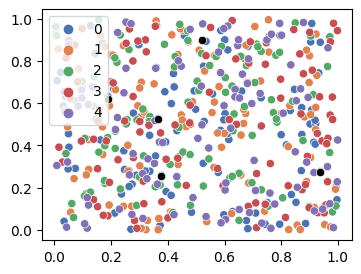

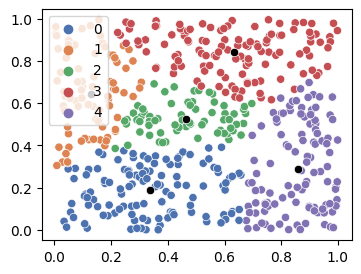

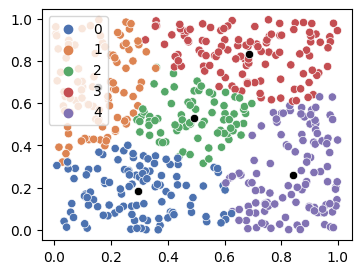

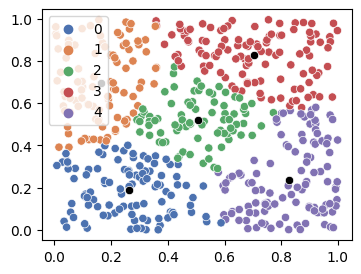

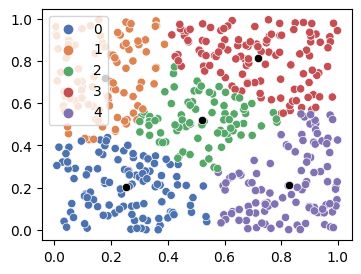

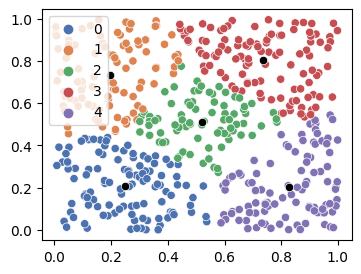

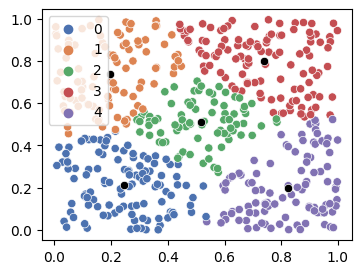

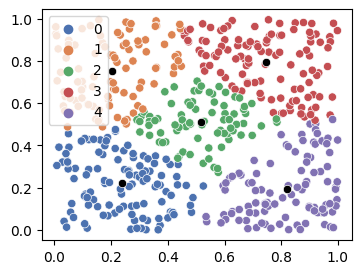

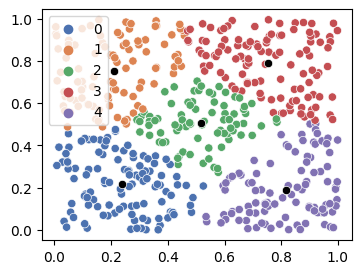

In [116]:
for i in range(len(labels_transition)):
  plt.figure(figsize=(4,3))
  sns.scatterplot(x = X[:,0], y = X[:,1], hue = labels_transition[i], palette="deep")
  sns.scatterplot(x = centroid_array_transition[i][:,0], y = centroid_array_transition[i][:,1], sizes = 6000, color = 'black')


In [117]:
Counter(classes)

Counter({0: 112, 1: 96, 2: 80, 3: 113, 4: 99})